# Creación y optimización de PORTAFOLIOS de inversión.

In [85]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

In [86]:
tickers = ['AAPL', 'NKE', 'TLEVISACPO.MX', 'BIMBOA.MX']
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2024,5,22)
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = yf.download(t, start=start, end=end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [87]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3620 entries, 2010-01-04 to 2024-05-21
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AAPL           3620 non-null   float64
 1   NKE            3620 non-null   float64
 2   TLEVISACPO.MX  3511 non-null   float64
 3   BIMBOA.MX      3511 non-null   float64
dtypes: float64(4)
memory usage: 141.4 KB


In [88]:
mydata.head()

,AAPL,NKE,TLEVISACPO.MX,BIMBOA.MX
Date,,,,
2010-01-04,6.461976,13.761753,50.012398,19.159435
2010-01-05,6.473148,13.816506,49.332840,19.181231
2010-01-06,6.370185,13.732274,48.864483,19.159435
2010-01-07,6.358407,13.867047,49.635876,19.288031
2010-01-08,6.400680,13.839674,48.497154,19.181231


In [89]:
mydata.tail()

,AAPL,NKE,TLEVISACPO.MX,BIMBOA.MX
Date,,,,
2024-05-15,189.720001,91.669998,11.20,70.559998
2024-05-16,189.839996,91.769997,11.12,71.459999
2024-05-17,189.869995,92.180000,11.10,69.889999
2024-05-20,191.039993,91.769997,11.29,69.820000
2024-05-21,192.350006,92.820000,10.91,69.940002


Normalización a 100:$$\frac{P_i}{P_0}*100$$

In [90]:
mydata.iloc[0] #Muestra los datos de la primer fila de todos 

AAPL              6.461976
NKE              13.761753
TLEVISACPO.MX    50.012398
BIMBOA.MX        19.159435
Name: 2010-01-04 00:00:00, dtype: float64

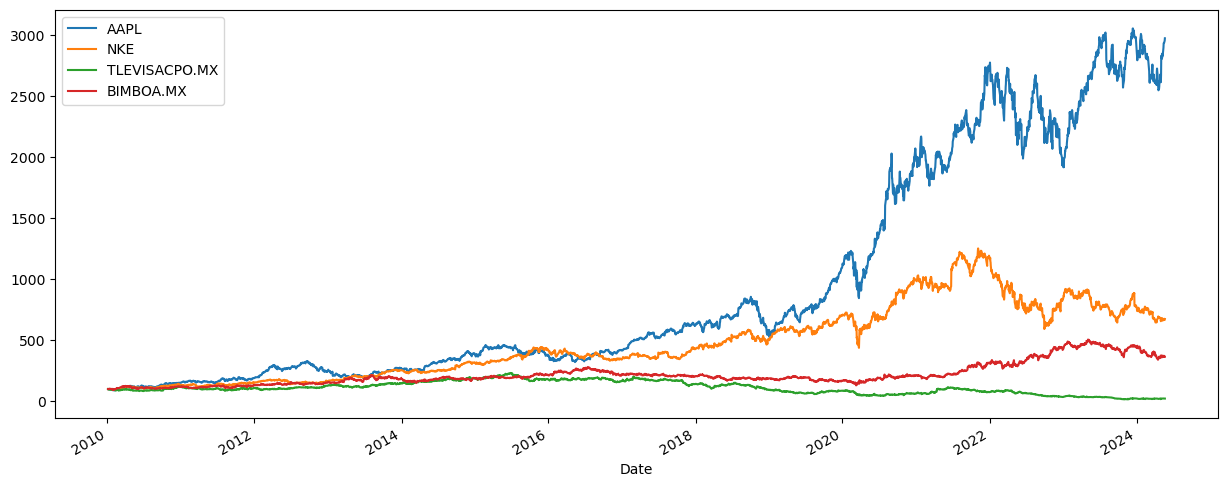

In [91]:
(mydata / mydata.iloc[0]*100).plot(figsize=(15,6))
plt.show() #Divide cada elemtnos de los datos entre el primer dato, es decir, porcentaje relativo al inicial valor

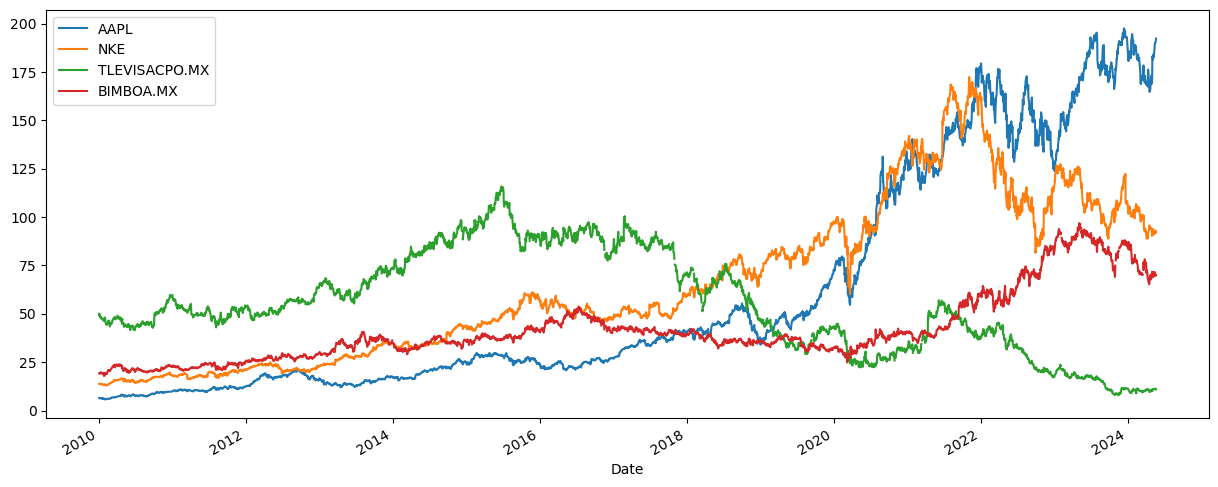

In [92]:
mydata.plot(figsize=(15,6))
plt.show() #Grafica los precios de los activos de cada empresa.

In [93]:
mydata.loc['2015-1-06'] #Nos da los datos en la fecha correspondiente.

AAPL             23.716957
NKE              41.987194
TLEVISACPO.MX    91.729660
BIMBOA.MX        35.347984
Name: 2015-01-06 00:00:00, dtype: float64

In [94]:
mydata.iloc[0]

AAPL              6.461976
NKE              13.761753
TLEVISACPO.MX    50.012398
BIMBOA.MX        19.159435
Name: 2010-01-04 00:00:00, dtype: float64

### Calculo de los retornos de un portafolio

In [95]:
returns = (mydata / mydata.shift(1))-1 
returns.head() #Retornos de cada uno de los activos, porcentajes

,AAPL,NKE,TLEVISACPO.MX,BIMBOA.MX
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.003979,-0.013588,0.001138
2010-01-06,-0.015906,-0.006096,-0.009494,-0.001136
2010-01-07,-0.001849,0.009814,0.015786,0.006712
2010-01-08,0.006648,-0.001974,-0.022942,-0.005537


In [96]:
weights = np.array([0.25, 0.25, 0.25, 0.25]) #Peso del portafolio

In [97]:
weights

array([0.25, 0.25, 0.25, 0.25])

\begin{equation*}
\text{np.dot(returns, weights)} = (r_1 \times w_1) + (r_2 \times w_2) + (r_3 \times w_3) + (r_4 \times w_4)
\end{equation*}


In [98]:
np.dot(returns,weights)

array([        nan, -0.00168564, -0.00815821, ..., -0.00478577,
        0.00445744, -0.0034101 ])

In [99]:
annual_returns= returns.mean()*250 #Retorno para un año 
annual_returns 


annual_returns= returns.mean()*250 #Retorno para un año 
annual_returns 

AAPL             0.273623
NKE              0.169206
TLEVISACPO.MX   -0.078206
BIMBOA.MX        0.110403
dtype: float64

In [100]:
np.dot(annual_returns, weights)

0.11875657244567142

In [101]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5)* 100) + '%' 
print(pfolio_1) #Creación del portafolio 1, round redondea a 5 deciamles 

#Es el rendimiento esperado.

11.876000000000001%


In [102]:
weights_2= np.array([0.4, 0.4, 0.15, 0.05])

In [103]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5)* 100) + '%' 
print(pfolio_1) #Creación del portafolio 2
print(pfolio_2)

11.876000000000001%
17.092%


 ## Optimización de los pesos por medio de Monte Carlo.

In [104]:
import numpy as np

#Sea x = W_APPL; y = W_NKE; z = W_TLEVISACPO.MX; w = W_BIMBOA.MX 
# Definimos la función objetivo
def objetivo(x, y, z, w):
    return 0.273623*x + 0.169206*y - 0.078206*z + 0.110403*w

# Número de iteraciones para la simulación
num_iteraciones = 1000000

# Variables para almacenar el valor máximo encontrado y las correspondientes variables x, y, z, w
max_valor = -np.inf #El -infinito de la computadora, el valor mas pequeño.
mejor_x, mejor_y, mejor_z, mejor_w = 0, 0, 0, 0

# Búsqueda aleatoria
for _ in range(num_iteraciones): #El_ es porque la variable sera ignorada, enotnces no importa el valor. 
    # Generar valores aleatorios para x, y, z
    x = np.random.rand()
    y = np.random.rand()
    z = np.random.rand()
    
    # Calcular w para que se cumpla la restricción x + y + z + w = 1
    w = 1 - x - y - z
    
    # Asegurarse de que w sea no negativo
    if w >= 0:
        valor = objetivo(x, y, z, w)
        if valor > max_valor:
            max_valor = valor
            mejor_x, mejor_y, mejor_z, mejor_w = x, y, z, w

# Resultados

weights_optimos = [mejor_x, mejor_y, mejor_z, mejor_w]
print(f"Máximo valor encontrado: {max_valor}")
print(f"Mejores valores: x = {mejor_x}, y = {mejor_y}, z = {mejor_z}, w = {mejor_w}")


Máximo valor encontrado: 0.2709942888160958
Mejores valores: x = 0.9900423804718879, y = 0.002422334921881264, z = 0.006075368009677007, w = 0.0014599165965538674


## Portafolio Optimo

In [105]:
pfolio_optimo = str(round(np.dot(annual_returns, weights_optimos), 5)* 100) + '%' 
print(pfolio_optimo) 

27.099%
